In [443]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import chi2_contingency, ttest_ind
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score, classification_report, confusion_matrix,accuracy_score,roc_auc_score,roc_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [444]:
df = pd.read_csv('speed_dating.csv')

df.head()

,gender,age,income,goal,career,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,0,21.0,69487.0,2.0,lawyer,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,0,21.0,69487.0,2.0,lawyer,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0
2,0,21.0,69487.0,2.0,lawyer,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0
3,0,21.0,69487.0,2.0,lawyer,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,2.0
4,0,21.0,69487.0,2.0,lawyer,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,2.0


In [445]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
print("Sayısal Sütunlar:", numerical_columns)

categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Kategorik Sütunlar:", categorical_columns)

Sayısal Sütunlar: ['gender', 'age', 'income', 'goal', 'dec', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met']
Kategorik Sütunlar: ['career']


In [446]:
imputer = IterativeImputer(max_iter=10, random_state=42)
df[numerical_columns] = imputer.fit_transform(df[numerical_columns])

print(df.isnull().sum())

gender     0
age        0
income     0
goal       0
career    89
dec        0
attr       0
sinc       0
intel      0
fun        0
amb        0
shar       0
like       0
prob       0
met        0
dtype: int64


In [447]:
df = df.drop('career', axis=1)  # axis=1, sütunları işaret eder

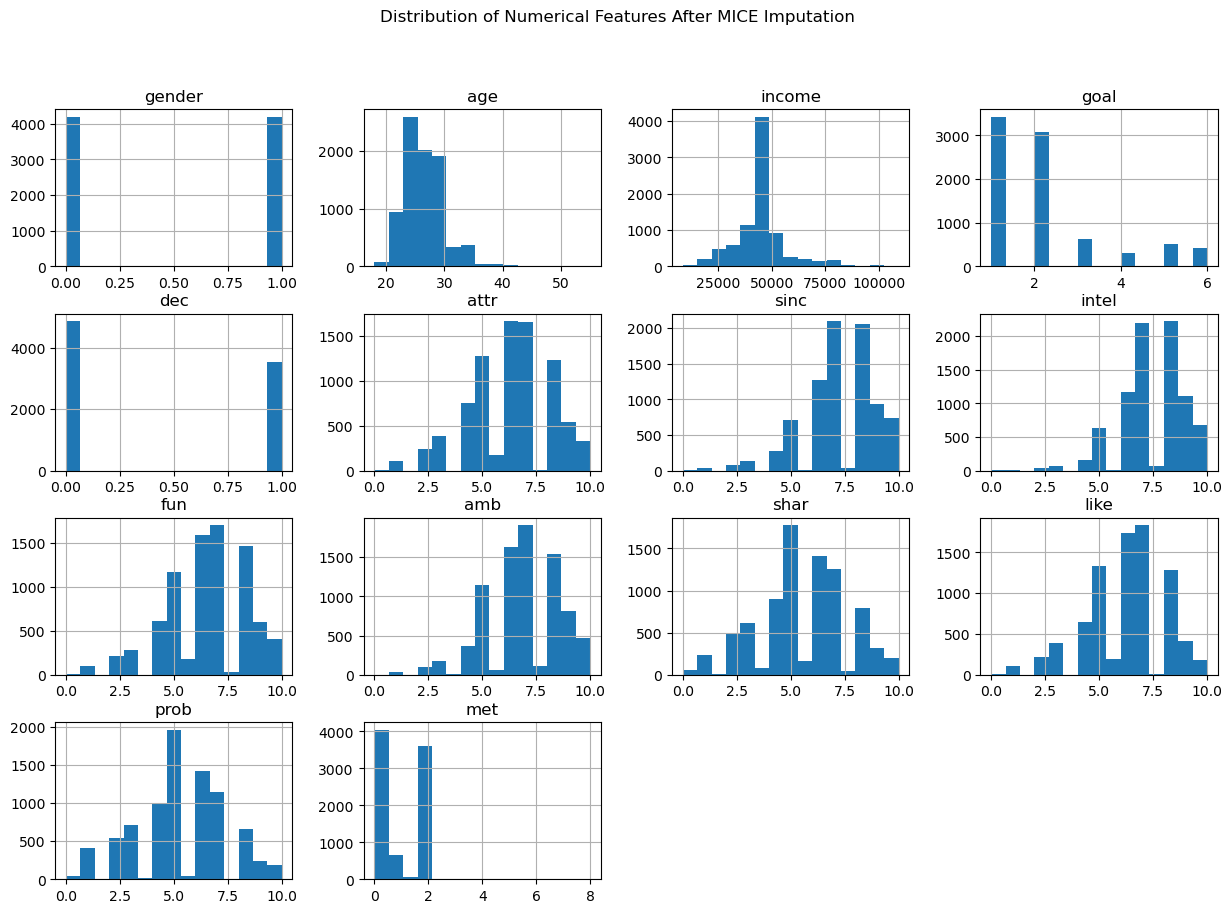

In [448]:
df[numerical_columns].hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Features After MICE Imputation")
plt.show()

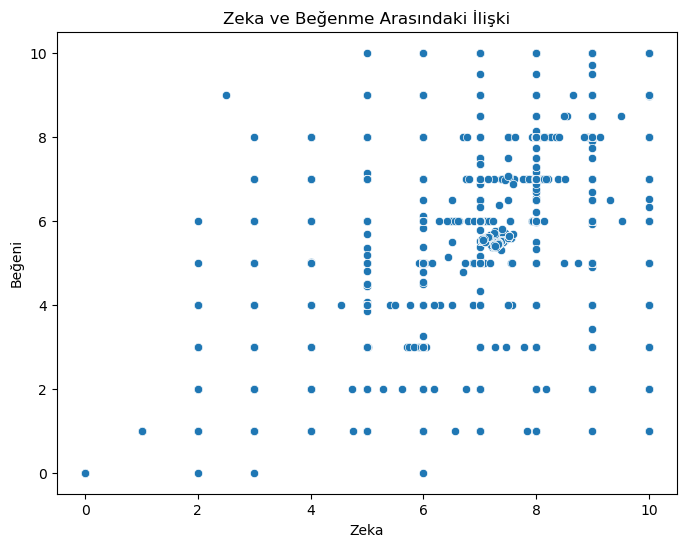

In [449]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='intel', y='like', data=df)
plt.title('Zeka ve Beğenme Arasındaki İlişki')
plt.xlabel('Zeka')
plt.ylabel('Beğeni')
plt.show()

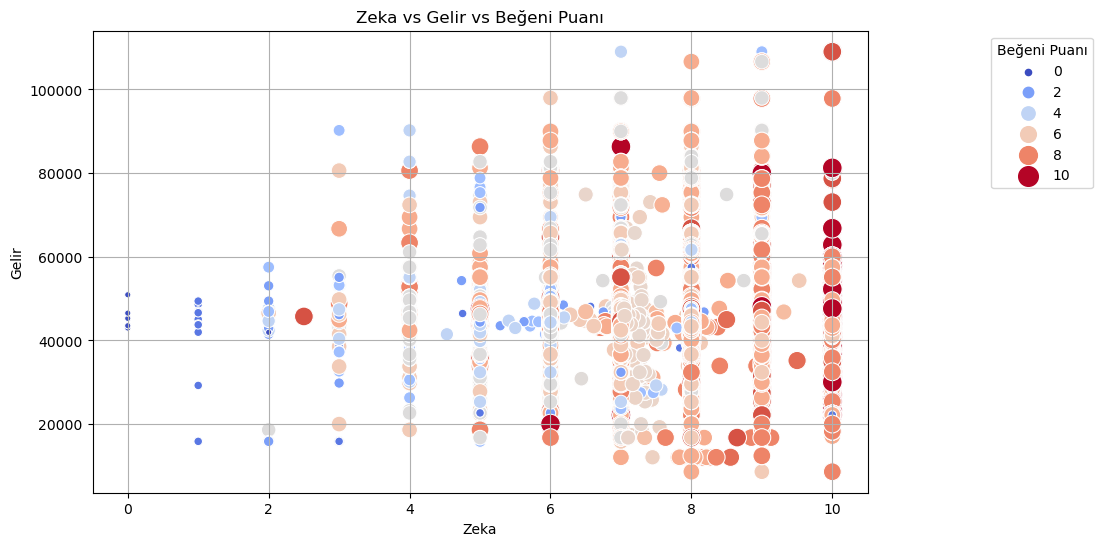

In [450]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='intel', y='income', hue='like', data=df, palette='coolwarm', size='like', sizes=(20, 200), legend='auto')
plt.title('Zeka vs Gelir vs Beğeni Puanı')
plt.xlabel('Zeka')
plt.ylabel('Gelir')
plt.legend(title='Beğeni Puanı', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

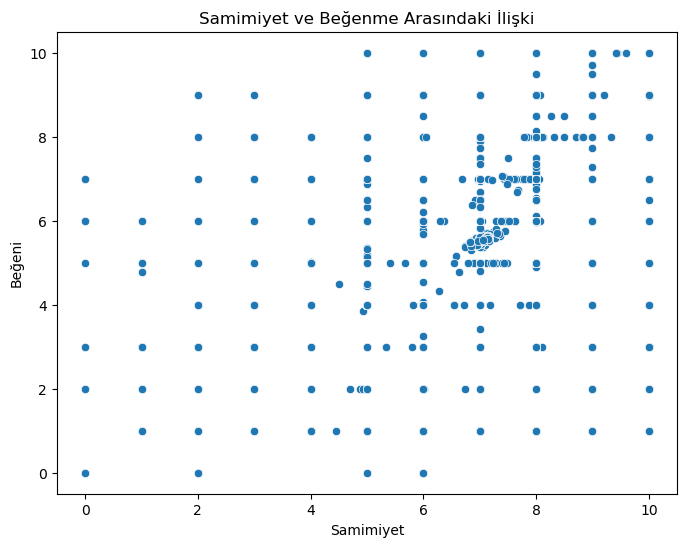

In [451]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sinc', y='like', data=df)
plt.title('Samimiyet ve Beğenme Arasındaki İlişki')
plt.xlabel('Samimiyet')
plt.ylabel('Beğeni')
plt.show()

In [452]:
df.drop(df[(df['met'] != 0) & (df['met'] != 1)].index, inplace=True)

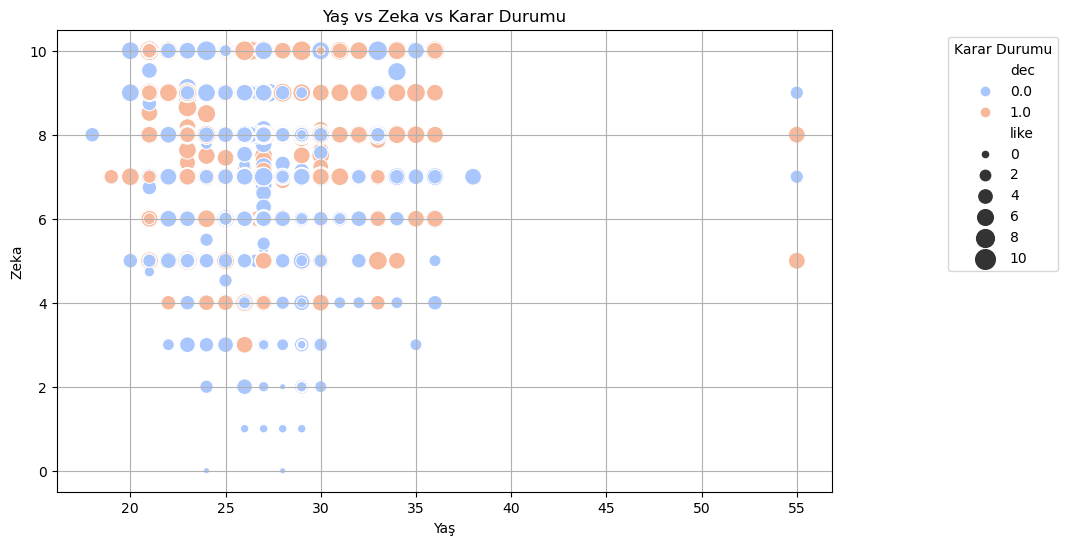

In [453]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='age', y='intel', hue='dec', data=df, palette='coolwarm', size='like', sizes=(20, 200), legend='auto')
plt.title('Yaş vs Zeka vs Karar Durumu')
plt.xlabel('Yaş')
plt.ylabel('Zeka')
plt.legend(title='Karar Durumu', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

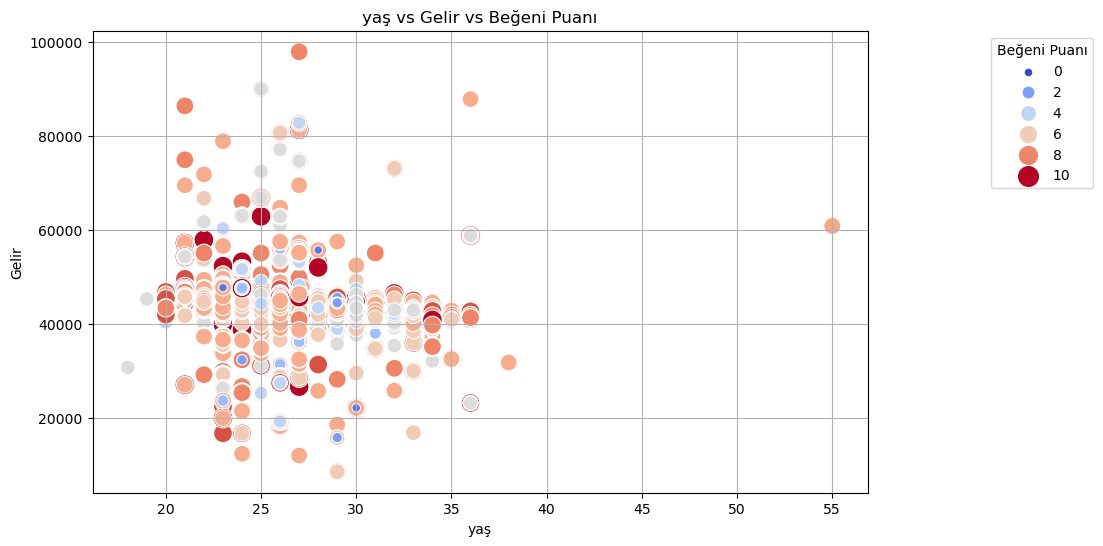

In [454]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='age', y='income', hue='like', data=df, palette='coolwarm', size='like', sizes=(20, 200), legend='auto')
plt.title('yaş vs Gelir vs Beğeni Puanı')
plt.xlabel('yaş')
plt.ylabel('Gelir')
plt.legend(title='Beğeni Puanı', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

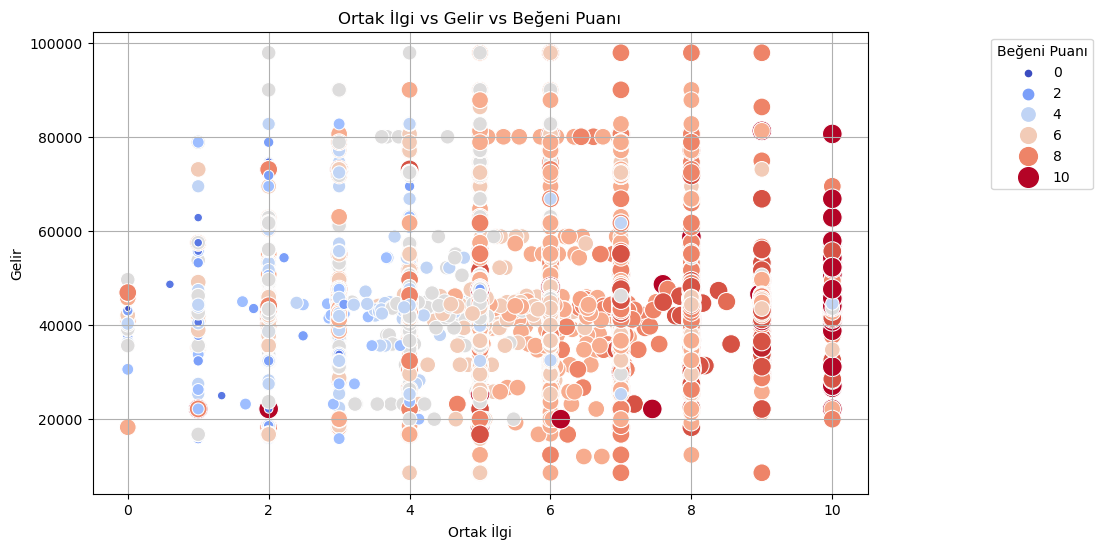

In [455]:
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x='shar', y='income', hue='like', data=df, palette='coolwarm', size='like', sizes=(20, 200), legend='auto')
plt.title('Ortak İlgi vs Gelir vs Beğeni Puanı')
plt.xlabel('Ortak İlgi')
plt.ylabel('Gelir')
plt.legend(title='Beğeni Puanı', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

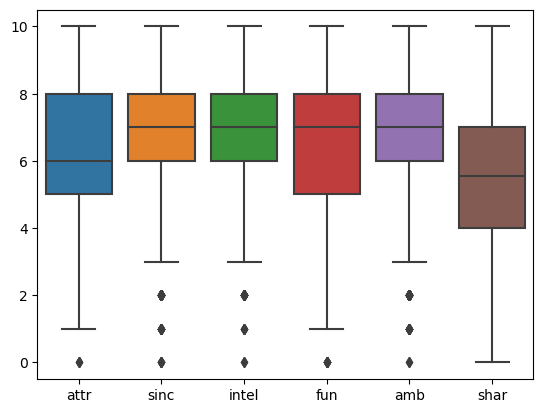

In [456]:
sns.boxplot(data=df[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar']])
plt.show()

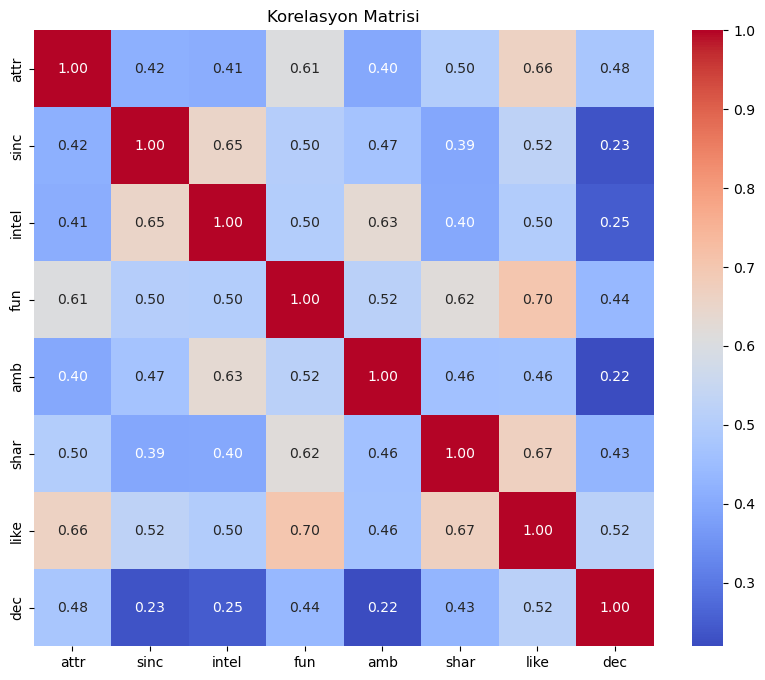

In [457]:
columns_of_interest = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'dec']
correlation_matrix = df[columns_of_interest].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Korelasyon Matrisi')
plt.show()

In [458]:
X = df[['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']]
y = df['dec']

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Shapes after split:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)

Shape of X: (4398, 8)
Shape of y: (4398,)
Shapes after split:
X_train: (3078, 8)
X_test: (1320, 8)
y_train: (3078,)
y_test: (1320,)


In [459]:

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

Accuracy: 0.7628787878787879
Precision: 0.7428571428571429
Recall: 0.7111111111111111
F1-score: 0.7266375545851529


In [460]:
categorical_features = ['gender', 'goal']
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

models = {
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Model Results:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(confusion_matrix(y_test, y_pred))
    print("\n")

Support Vector Machine Model Results:
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       735
         1.0       0.78      0.72      0.75       585

    accuracy                           0.79      1320
   macro avg       0.78      0.78      0.78      1320
weighted avg       0.79      0.79      0.78      1320

Accuracy: 0.7856060606060606
[[614 121]
 [162 423]]


Decision Tree Model Results:
              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73       735
         1.0       0.66      0.65      0.65       585

    accuracy                           0.70      1320
   macro avg       0.69      0.69      0.69      1320
weighted avg       0.70      0.70      0.70      1320

Accuracy: 0.6977272727272728
[[543 192]
 [207 378]]


Random Forest Model Results:
              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80       735
         1.0       0.75      0.71

Accuracy: 0.7818181818181819
Confusion Matrix:
[[603 132]
 [156 429]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.79      0.82      0.81       735
         1.0       0.76      0.73      0.75       585

    accuracy                           0.78      1320
   macro avg       0.78      0.78      0.78      1320
weighted avg       0.78      0.78      0.78      1320



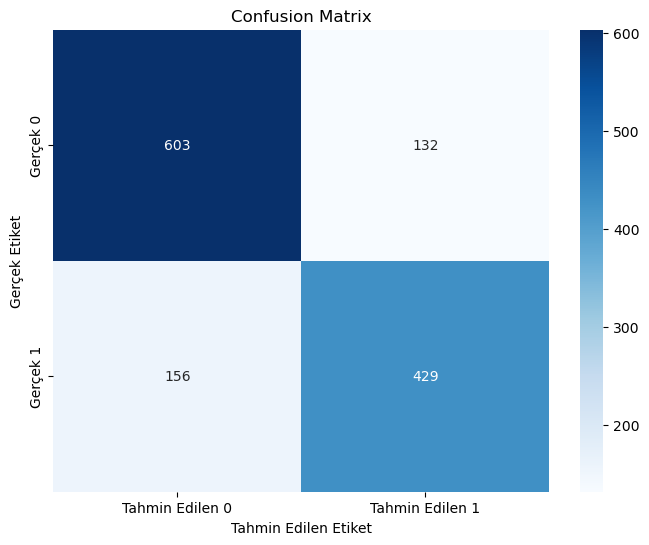

In [461]:
logreg_model = LogisticRegression(solver='lbfgs', max_iter=1000)
logreg_model.fit(X_train, y_train)

y_pred = logreg_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Tahmin Edilen 0', 'Tahmin Edilen 1'],
            yticklabels=['Gerçek 0', 'Gerçek 1'])
plt.xlabel('Tahmin Edilen Etiket')
plt.ylabel('Gerçek Etiket')
plt.title('Confusion Matrix')
plt.show()

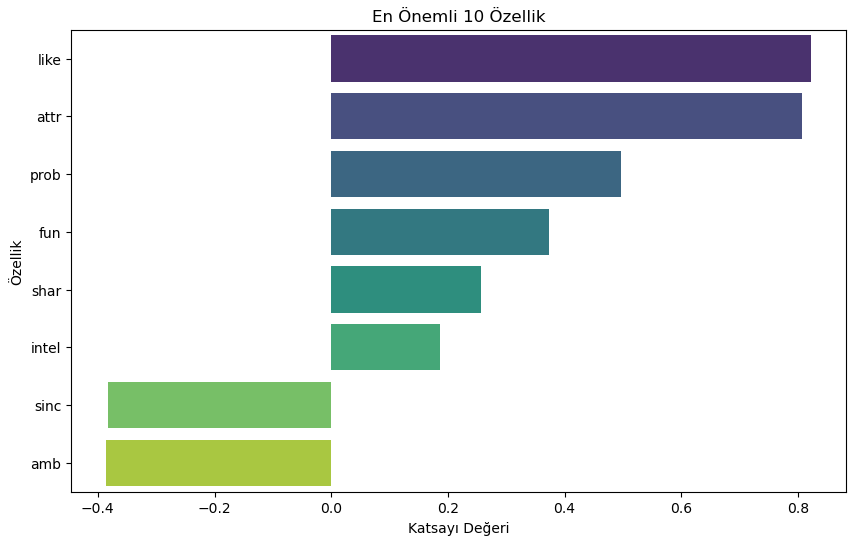

In [462]:
coefficients = logreg_model.coef_[0]

feature_names = X.columns

feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance.head(10), palette="viridis")
plt.xlabel('Katsayı Değeri')
plt.ylabel('Özellik')
plt.title('En Önemli 10 Özellik')
plt.show()

In [463]:
df = pd.get_dummies(df, columns=['gender', 'goal' ])

xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_report_knn = classification_report(y_test, y_pred_knn)

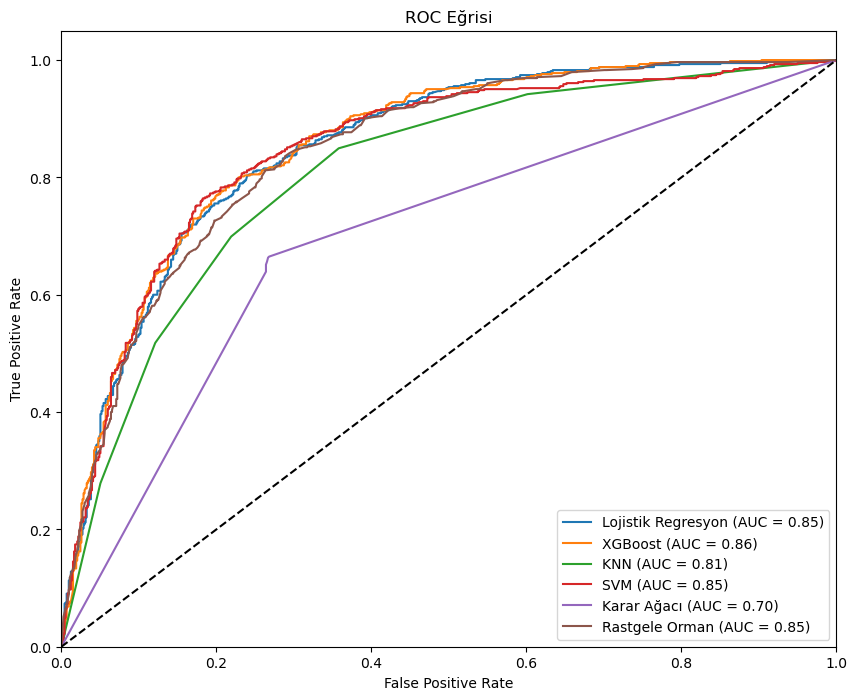

In [464]:
svm_model = SVC(probability=True) # probability=True ekle
svm_model.fit(X_train, y_train)
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_prob_dt)
auc_dt = roc_auc_score(y_test, y_prob_dt)

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_prob_rf)
auc_rf = roc_auc_score(y_test, y_prob_rf)

plt.figure(figsize=(10, 8))
plt.plot(fpr_lr, tpr_lr, label=f"Lojistik Regresyon (AUC = {auc_lr:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.2f})")
plt.plot(fpr_dt, tpr_dt, label=f"Karar Ağacı (AUC = {auc_dt:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Rastgele Orman (AUC = {auc_rf:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

In [465]:
models = {
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

In [466]:
model_results = {}
confusion_matrices = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)
    print(f"{name} Model Results:")
    print(classification_report(y_test, y_pred))
    print(f"Accuracy: {accuracy}")
    print(confusion_matrices[name])
    print("\n")


Support Vector Machine Model Results:
              precision    recall  f1-score   support

         0.0       0.79      0.84      0.81       735
         1.0       0.78      0.72      0.75       585

    accuracy                           0.79      1320
   macro avg       0.78      0.78      0.78      1320
weighted avg       0.79      0.79      0.78      1320

Accuracy: 0.7856060606060606
[[614 121]
 [162 423]]


Decision Tree Model Results:
              precision    recall  f1-score   support

         0.0       0.71      0.74      0.72       735
         1.0       0.66      0.62      0.64       585

    accuracy                           0.69      1320
   macro avg       0.68      0.68      0.68      1320
weighted avg       0.69      0.69      0.69      1320

Accuracy: 0.6878787878787879
[[543 192]
 [220 365]]


Random Forest Model Results:
              precision    recall  f1-score   support

         0.0       0.78      0.81      0.79       735
         1.0       0.75      0.70

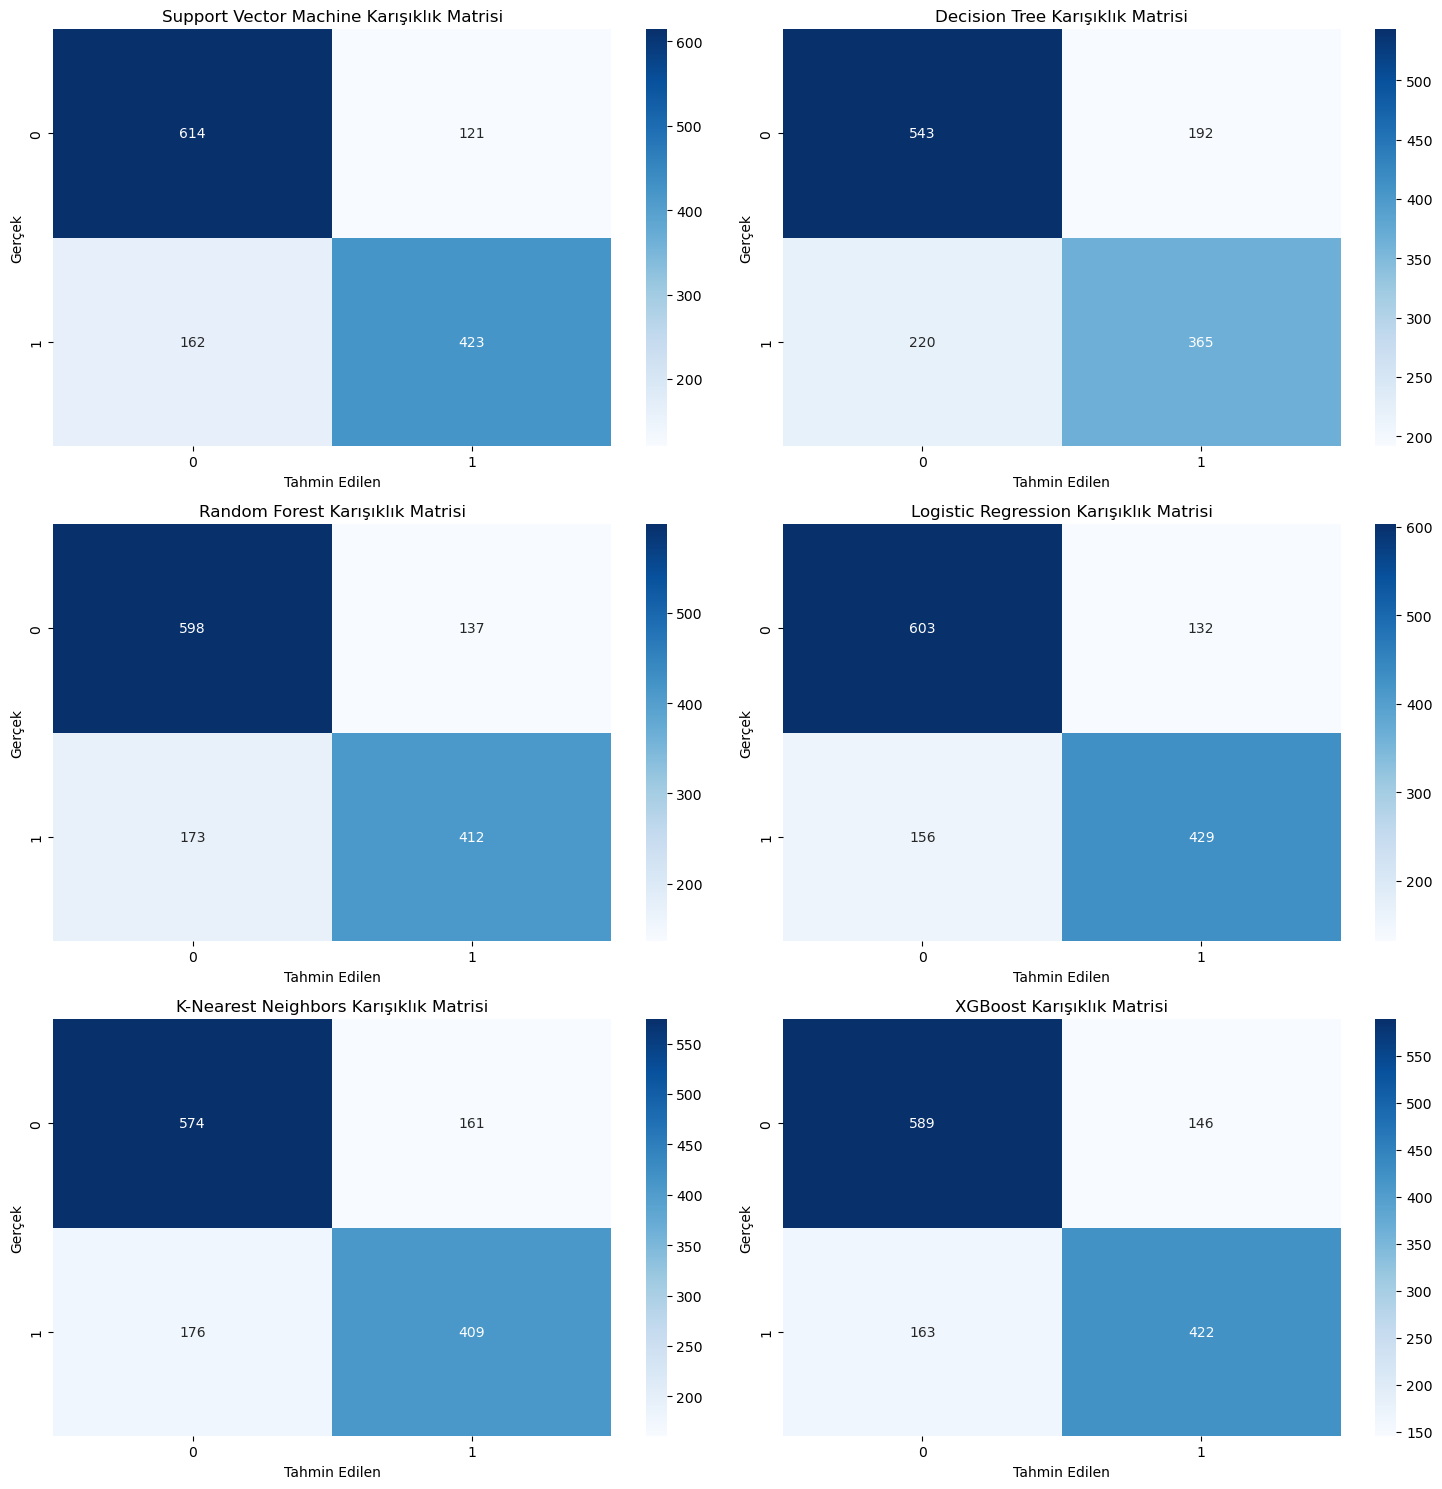

In [467]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
axes = axes.flatten()

for ax, (name, cm) in zip(axes, confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f"{name} Karışıklık Matrisi")
    ax.set_xlabel("Tahmin Edilen")
    ax.set_ylabel("Gerçek")

plt.tight_layout()
plt.show()

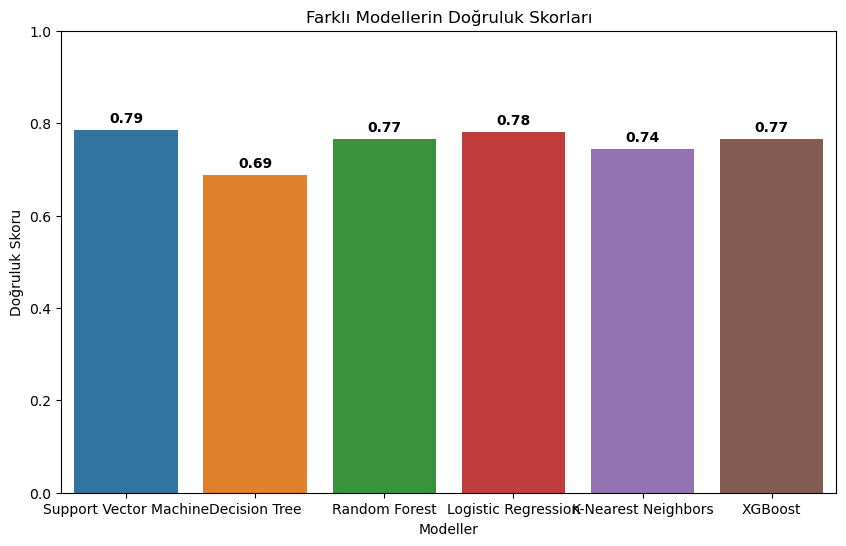

In [468]:
model_names = list(model_results.keys())
accuracies = list(model_results.values())

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=model_names, y=accuracies)
plt.xlabel("Modeller")
plt.ylabel("Doğruluk Skoru")
plt.title("Farklı Modellerin Doğruluk Skorları")
plt.ylim(0, 1)

for i, v in enumerate(accuracies):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')

plt.show()